In [1]:
 # Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns

# Import API key
from config import geoapify_key

In [2]:
# Read in csv files
nyc_airbnbs = pd.read_csv("AB_NYC_2019.csv")
nyc_airbnbs.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# check N/A values; drop N/A values if necessary 
nyc_airbnbs.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


## Analysis of neighborhoods

In [4]:
# Number of unique neighborhood groups
nyc_airbnbs.neighbourhood_group.nunique()

5

In [5]:
# What are the neighbourhood groups listed?
nyc_airbnbs.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [6]:
# How many listings are in each neighborhood groups?
nyc_airbnbs.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Text(0, 0.5, '')

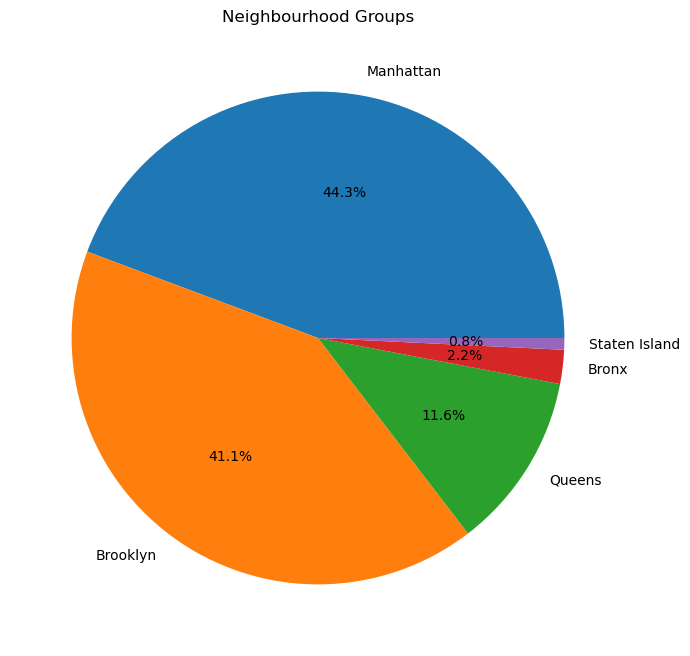

In [7]:
pieplot1 = nyc_airbnbs.neighbourhood_group.value_counts().plot.pie(title='Neighbourhood Groups',
                                               figsize=(8,8),
                                              autopct='%1.1f%%')
pieplot1.set_ylabel(None)

In [8]:
# Number of unique neighborhoods
nyc_airbnbs.neighbourhood.nunique()

221

In [9]:
# What are the neighborhoods listed?
nyc_airbnbs.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [10]:
# How many listings are in each neighborhoods?
nyc_airbnbs.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [11]:
# Convert neighbourhood Series to Dataframe
neighbourhood_df = nyc_airbnbs.neighbourhood.value_counts()
neighbourhood_df = neighbourhood_df.to_frame()

# Rename column to count for easier reading
neighbourhood_df = neighbourhood_df.rename(columns={'neighbourhood':'count'})

# Examination
neighbourhood_df.head()

,count
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971


## Analysis of Room Types

In [12]:
# What are the different room types available?
nyc_airbnbs.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [13]:
# How many listings are under each room type category?
nyc_airbnbs.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Number of Listings by Room Type')

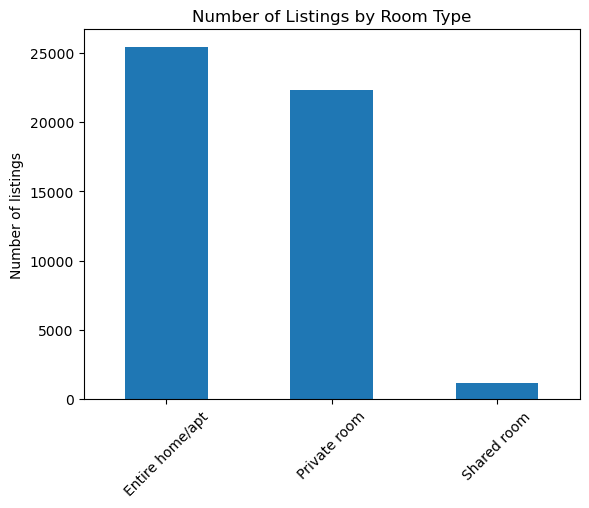

In [14]:
barplot1 = nyc_airbnbs.room_type.value_counts().plot.bar(rot=45)
barplot1.set_ylabel("Number of listings")
plt.title('Number of Listings by Room Type')

In [15]:
neighbourhood_group_room_type = nyc_airbnbs.groupby(['neighbourhood_group','room_type']).size().reset_index()
neighbourhood_group_room_type.columns = ['neighbourhood_group','room_type','count']
neighbourhood_group_room_type

,neighbourhood_group,room_type,count
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


In [16]:
neighbourhood_group_room_type=neighbourhood_group_room_type.pivot_table(index=['neighbourhood_group'],columns=['room_type'], values=['count'])
neighbourhood_group_room_type

count                         
room_type           Entire home/apt Private room Shared room
neighbourhood_group                                         
Bronx                           379          652          60
Brooklyn                       9559        10132         413
Manhattan                     13199         7982         480
Queens                         2096         3372         198
Staten Island                   176          188           9

Text(0.5, 1.0, 'Number of Listings by Room Type based on Neighbourhood Group')

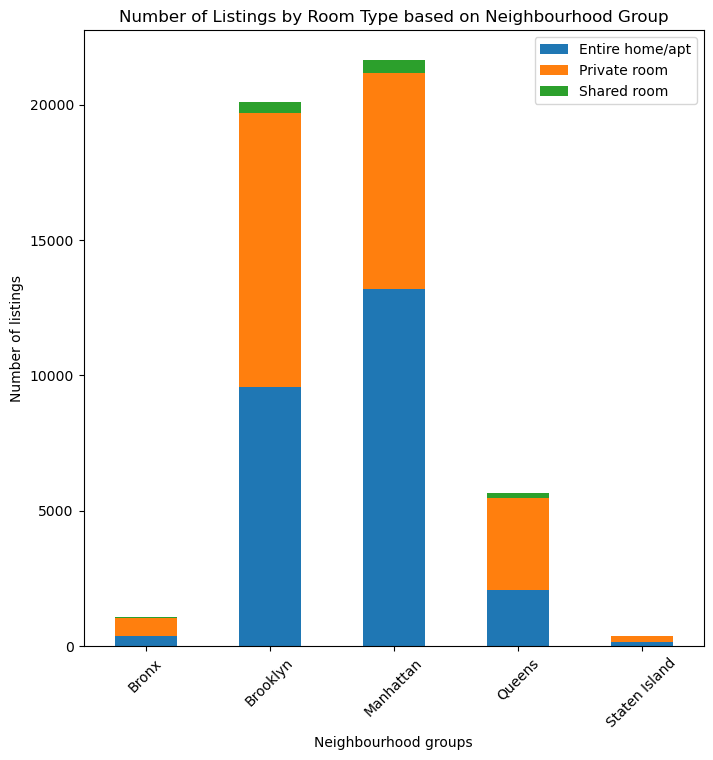

In [17]:
barplot2 = neighbourhood_group_room_type.plot.bar(stacked=True, rot=45, figsize=(8,8))
barplot2.set_ylabel("Number of listings")
barplot2.set_xlabel("Neighbourhood groups")
barplot2.legend(['Entire home/apt','Private room','Shared room'])
plt.title("Number of Listings by Room Type based on Neighbourhood Group")

## Room Type vs Price

In [18]:
nyc_airbnbs_clean = nyc_airbnbs.dropna()
nyc_airbnbs_clean.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


<BarContainer object of 38821 artists>

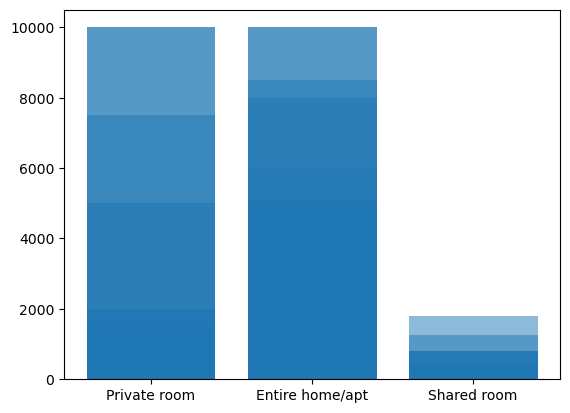

In [19]:
x_value = "room_type"
y_value = "price"
plt.bar(nyc_airbnbs_clean["room_type"], nyc_airbnbs_clean["price"], alpha=.5, align="center")

In [20]:
bins = [0, 99, 199, 299, 399, 599, 999, 1999, 2999, 9999, 20000]

# Create labels for these bins
group_labels = ["0 to 100", "100 to 200", "200 to 300", "300 to 400", "400 to 600", "600 to 1k", "1k to 2k",
                "2k to 3k", "3k to 10k", '10k +']

In [21]:
pd.cut(nyc_airbnbs_clean["price"], bins, labels=group_labels).head()

0    100 to 200
1    200 to 300
3      0 to 100
4      0 to 100
5    200 to 300
Name: price, dtype: category
Categories (10, object): ['0 to 100' < '100 to 200' < '200 to 300' < '300 to 400' ... '1k to 2k' < '2k to 3k' < '3k to 10k' < '10k +']

In [22]:
nyc_airbnbs_clean["price_group"] = pd.cut(nyc_airbnbs_clean["price"], bins, labels=group_labels)
nyc_airbnbs_clean.head()

C:\Users\steve\AppData\Local\Temp\ipykernel_11940\3868239109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_airbnbs_clean["price_group"] = pd.cut(nyc_airbnbs_clean["price"], bins, labels=group_labels)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_group
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,100 to 200
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,200 to 300
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0 to 100
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0 to 100
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,200 to 300


In [23]:
#price_cat = nyc_airbnbs_clean.sort_values(by=['room_type', 'price_group'])

price_cat = nyc_airbnbs_clean.groupby(["room_type", "price_group"]).count()

# Find how many rows fall into each bin
price_cat

id   name  host_id  host_name  \
room_type       price_group                                     
Entire home/apt 0 to 100      3087   3087     3087       3087   
                100 to 200   10837  10837    10837      10837   
                200 to 300    4052   4052     4052       4052   
                300 to 400    1201   1201     1201       1201   
                400 to 600     708    708      708        708   
                600 to 1k      313    313      313        313   
                1k to 2k        78     78       78         78   
                2k to 3k        27     27       27         27   
                3k to 10k       16     16       16         16   
                10k +            1      1        1          1   
Private room    0 to 100     14009  14009    14009      14009   
                100 to 200    3140   3140     3140       3140   
                200 to 300     289    289      289        289   
                300 to 400      99     99       99         99   
                400 to 600      54     54       54         54   
                600 to 1k       43     43       43         43   
                1k to 2k         7      7        7          7   
                2k to 3k         2      2        2          2   
                3k to 10k        3      3        3          3   
                10k +            1      1        1          1   
Shared room     0 to 100       765    765      765        765   
                100 to 200      59     59       59         59   
                200 to 300      10     10       10         10   
                300 to 400       3      3        3          3   
                400 to 600       2      2        2          2   
                600 to 1k        3      3        3          3   
                1k to 2k         2      2        2          2   
                2k to 3k         0      0        0          0   
                3k to 10k        0      0        0          0   
                10k +            0      0        0          0   

                             neighbourhood_group  neighbourhood  latitude  \
room_type       price_group                                                 
Entire home/apt 0 to 100                    3087           3087      3087   
                100 to 200                 10837          10837     10837   
                200 to 300                  4052           4052      4052   
                300 to 400                  1201           1201      1201   
                400 to 600                   708            708       708   
                600 to 1k                    313            313       313   
                1k to 2k                      78             78        78   
                2k to 3k                      27             27        27   
                3k to 10k                     16             16        16   
                10k +                          1              1         1   
Private room    0 to 100                   14009          14009     14009   
                100 to 200                  3140           3140      3140   
                200 to 300                   289            289       289   
                300 to 400                    99             99        99   
                400 to 600                    54             54        54   
                600 to 1k                     43             43        43   
                1k to 2k                       7              7         7   
                2k to 3k                       2              2         2   
                3k to 10k                      3              3         3   
                10k +                          1              1         1   
Shared room     0 to 100                     765            765       765   
                100 to 200                    59             59        59   
                200 to 300                    10             10        10   
                300 to 400

In [24]:
nyc_airbnbs_clean.loc[:, "room_type"].drop_duplicates()

0        Private room
1     Entire home/apt
39        Shared room
Name: room_type, dtype: object

In [25]:
room_price_cat = pd.pivot_table(
    price_cat, 
    values="name",
    index="room_type",
    columns="price_group" 
)

In [26]:
room_price_cat

price_group,0 to 100,100 to 200,200 to 300,300 to 400,400 to 600,600 to 1k,1k to 2k,2k to 3k,3k to 10k,10k +
room_type,,,,,,,,,,
Entire home/apt,3087,10837,4052,1201,708,313,78,27,16,1
Private room,14009,3140,289,99,54,43,7,2,3,1
Shared room,765,59,10,3,2,3,2,0,0,0


Text(0.5, 1.0, 'Room Type by Price ')

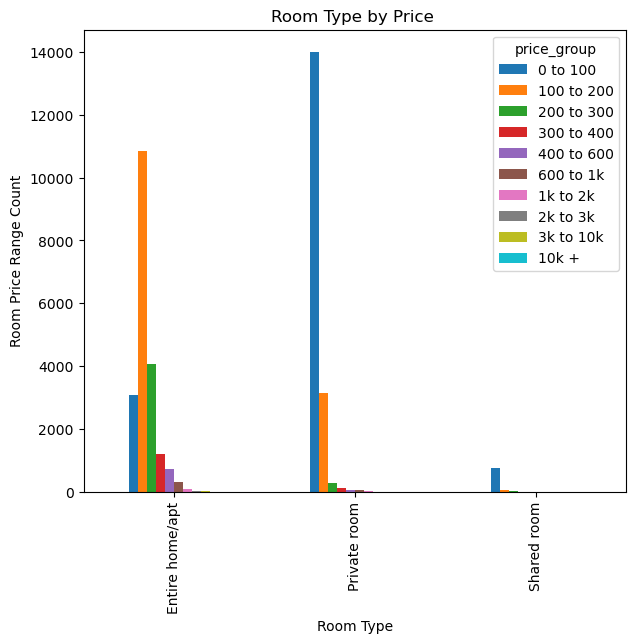

In [27]:
ax = room_price_cat.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(7, 6)
ax.set_xlabel("Room Type")
ax.set_ylabel("Room Price Range Count")
plt.title("Room Type by Price ")

In [28]:
room_price_pie = pd.pivot_table(
    price_cat, 
    values="name",
    index="price_group",
    columns="room_type" 
)

room_price_pie

room_type,Entire home/apt,Private room,Shared room
price_group,,,
0 to 100,3087,14009,765
100 to 200,10837,3140,59
200 to 300,4052,289,10
300 to 400,1201,99,3
400 to 600,708,54,2
600 to 1k,313,43,3
1k to 2k,78,7,2
2k to 3k,27,2,0
3k to 10k,16,3,0


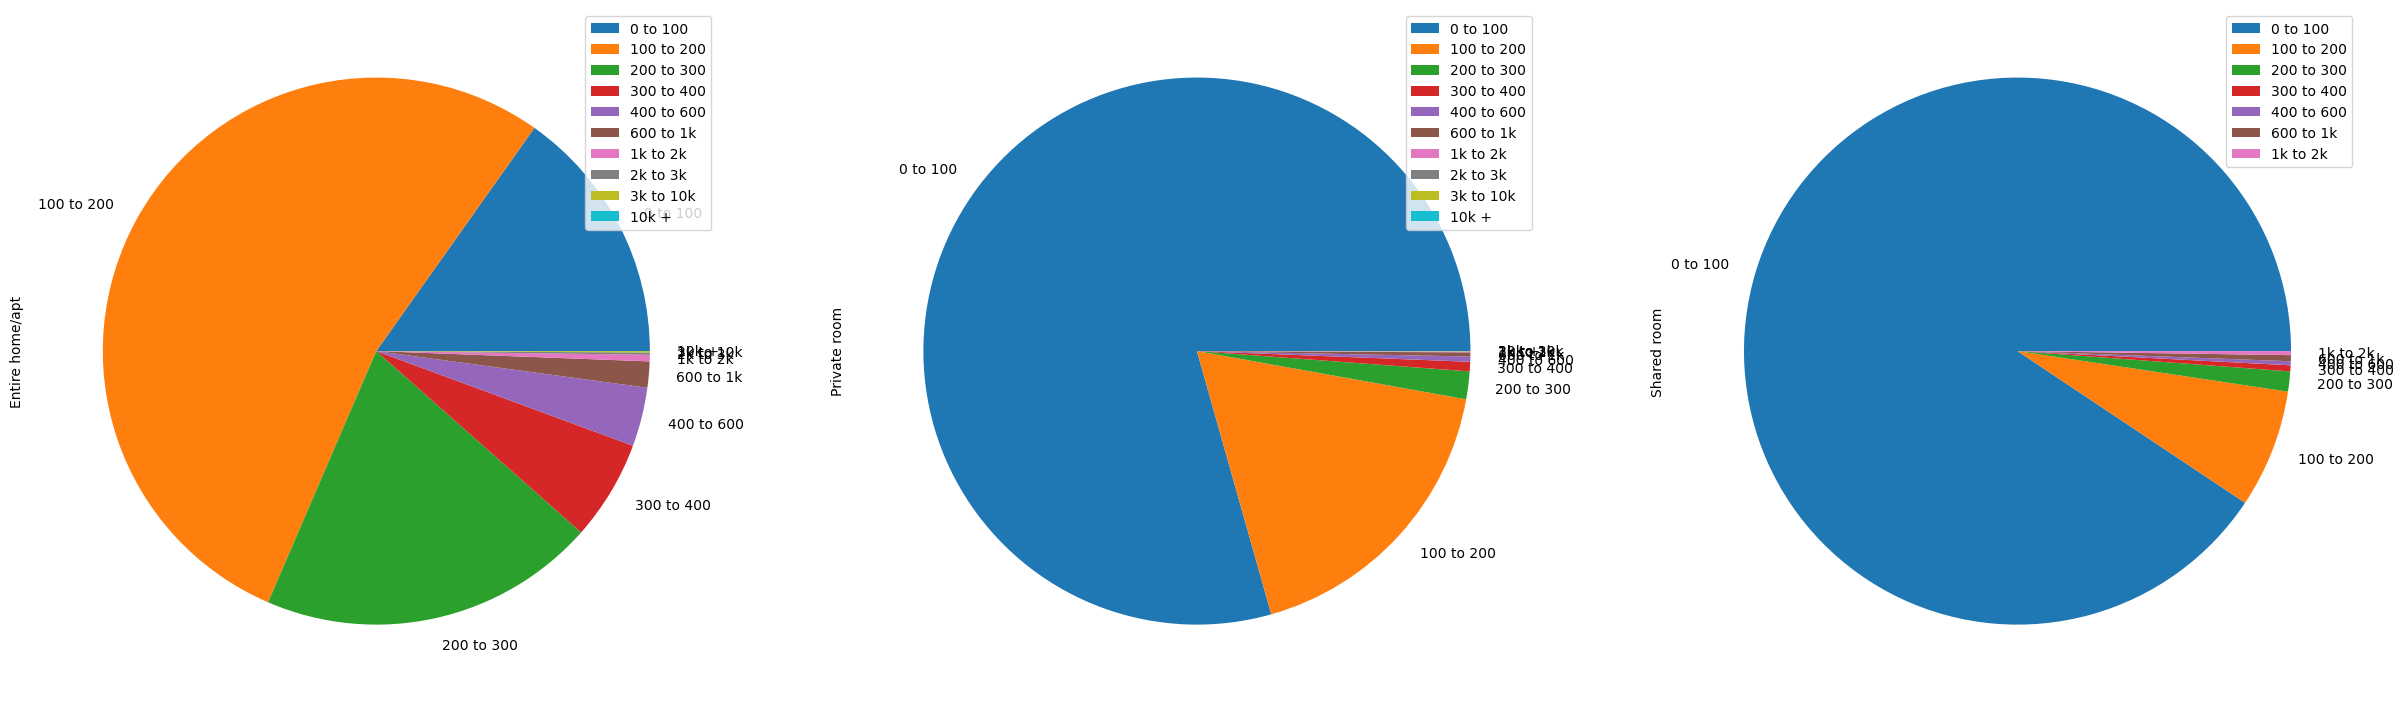

In [29]:
plot = room_price_pie.plot.pie(subplots=True, figsize=(30, 100))

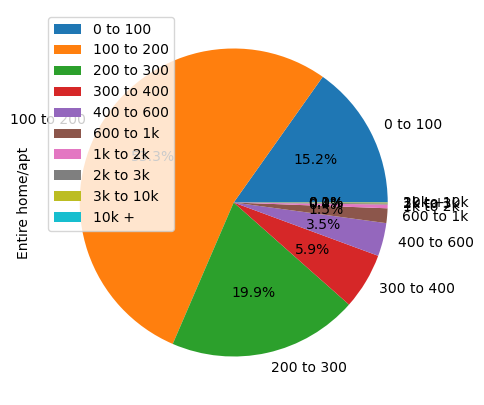

In [30]:
plot = room_price_pie.plot.pie(y='Entire home/apt', autopct='%1.1f%%', figsize=(5, 5))

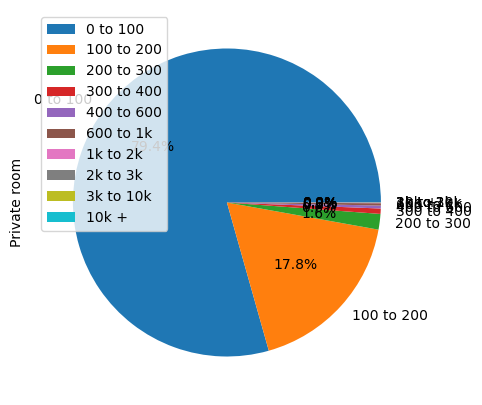

In [31]:
plot = room_price_pie.plot.pie(y='Private room', autopct='%1.1f%%', figsize=(5, 5))

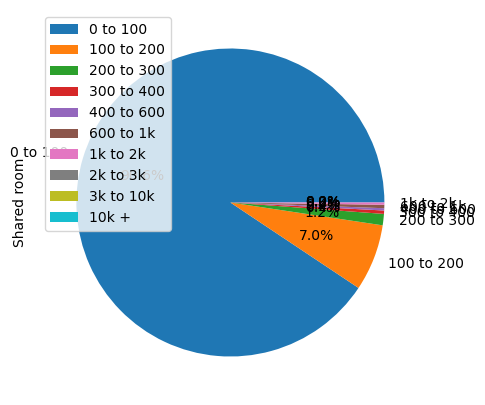

In [32]:
plot = room_price_pie.plot.pie(y='Shared room', autopct='%1.1f%%', figsize=(5, 5))

## What can we learn about different hosts and areas?

In [33]:
# number of unique hosts
unique_hosts = nyc_airbnbs['host_id'].nunique()
print("Number of unique hosts:", unique_hosts)

Number of unique hosts: 37457


In [34]:
# top 10 hosts with the most listings
top_hosts = nyc_airbnbs['host_id'].value_counts().nlargest(10)
print("Top 10 hosts with the most listings:", top_hosts)

Top 10 hosts with the most listings: 219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64


In [35]:
# number of unique areas
unique_areas = nyc_airbnbs['neighbourhood_group'].nunique()
print("Number of unique areas:", unique_areas)

Number of unique areas: 5


In [36]:
# What can we learn from predictions? (ex: locations, prices, reviews, etc)
# average price of listings by area
avg_price_by_area = nyc_airbnbs.groupby('neighbourhood_group').mean(numeric_only=True)['price']
print("Average price of listings by area:", avg_price_by_area)

Average price of listings by area: neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


In [37]:
# average number of reviews by area
avg_reviews_by_area = nyc_airbnbs.groupby('neighbourhood_group').mean(numeric_only=True)['number_of_reviews']
print("Average number of reviews by area:", avg_reviews_by_area)

Average number of reviews by area: neighbourhood_group
Bronx            26.004583
Brooklyn         24.202845
Manhattan        20.985596
Queens           27.700318
Staten Island    30.941019
Name: number_of_reviews, dtype: float64


### Which hosts are the busiest and why?

In [38]:
# Using [:10] for top 10 results 
TopHosts = nyc_airbnbs['host_name'].value_counts()[:10]
TopHosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'Top 10 hosts of listings in NYC')

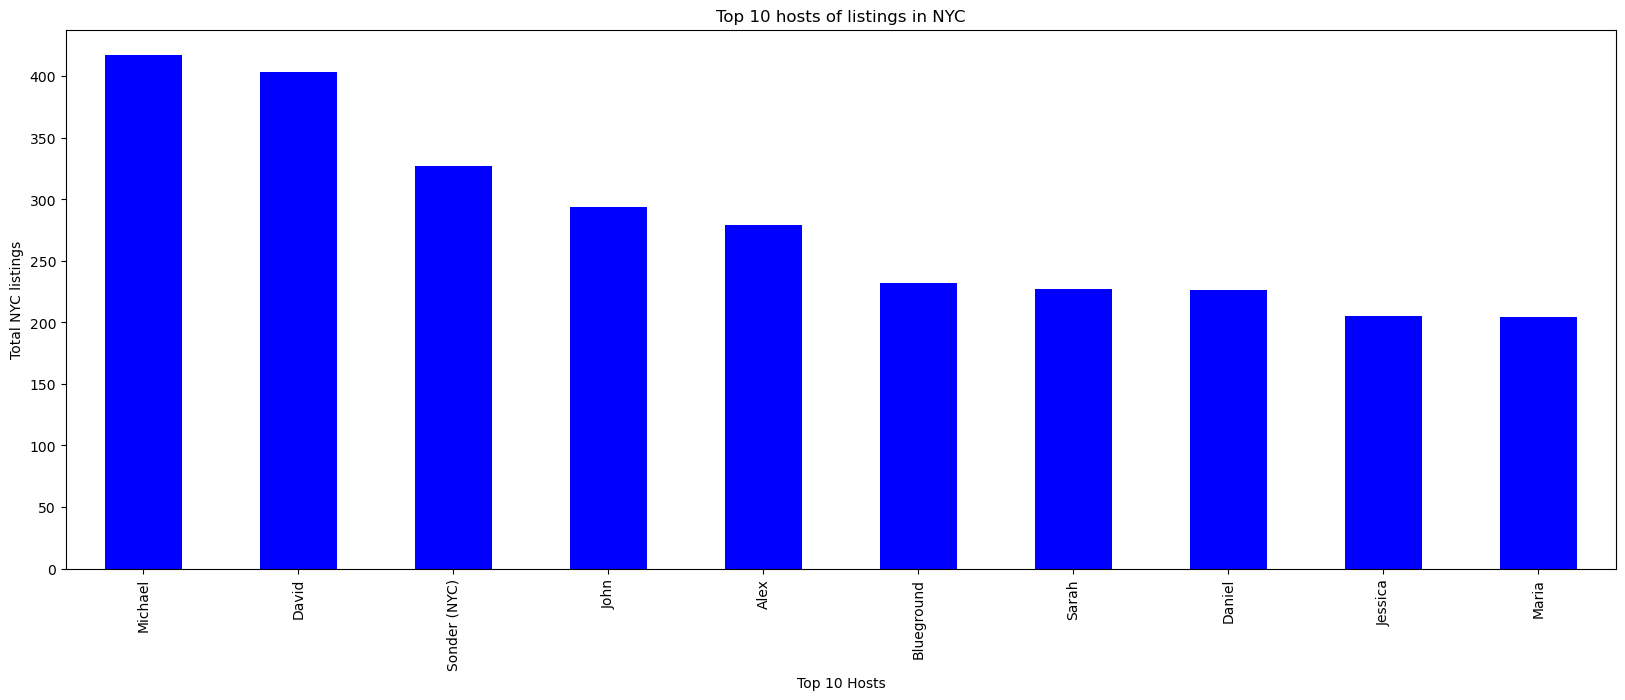

In [39]:
# Which hosts are the busiest and why?
# bar plot of top 10 hosts with the most listings
#Bar graph Representing the top hosts in New yYork city
TopHosts.plot(kind = 'bar', color = 'blue', figsize = (20, 7))
plt.xlabel('Top 10 Hosts')
plt.ylabel('Total NYC listings')
plt.title('Top 10 hosts of listings in NYC')

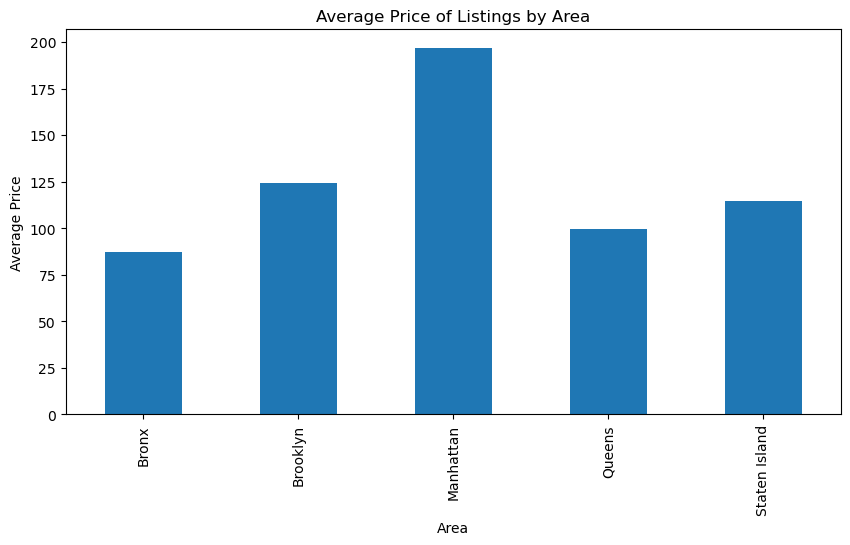

In [40]:
# Is there any noticeable difference of traffic among different areas and what could be the reason for it?
# bar plot of average price of listings by area
avg_price_by_area.plot(kind='bar', figsize=(10,5))
plt.xlabel("Area")
plt.ylabel("Average Price")
plt.title("Average Price of Listings by Area")
plt.show()

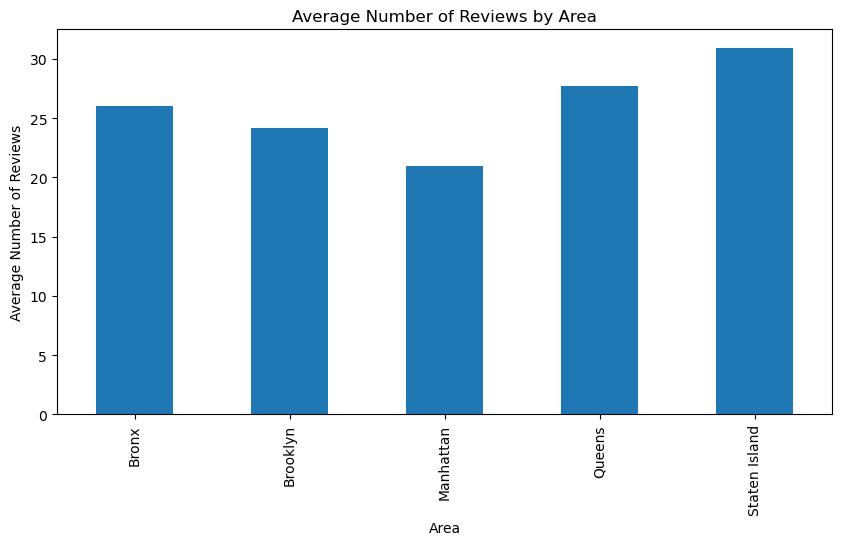

In [41]:
# bar plot of average number of reviews by area
avg_reviews_by_area.plot(kind='bar', figsize=(10,5))
plt.xlabel("Area")
plt.ylabel("Average Number of Reviews")
plt.title("Average Number of Reviews by Area")
plt.show()

In [42]:
# Check when was the last review available
nyc_airbnbs['last_review'] = pd.to_datetime(nyc_airbnbs['last_review'])
nyc_airbnbs['last_reviewed_year'] = nyc_airbnbs['last_review'].dt.year

<AxesSubplot:xlabel='last_reviewed_year', ylabel='count'>

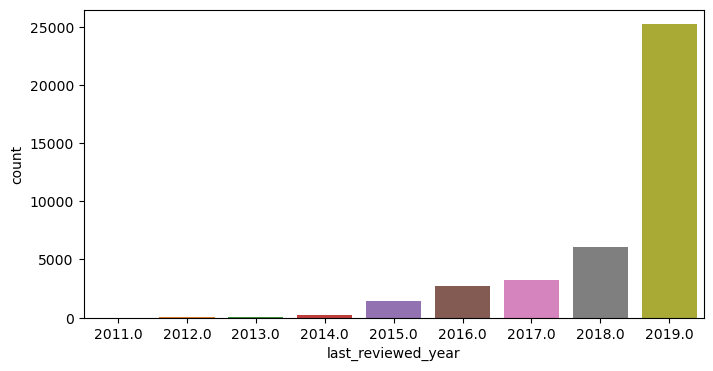

In [43]:
plt.figure(figsize=(8,4),dpi=100)
sns.countplot(data=nyc_airbnbs,x='last_reviewed_year')

## What factors affect the price of an Airbnb listing?

In [44]:
nyc_airbnbs.groupby('room_type').price.mean()

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

Text(0.5, 1.0, '')

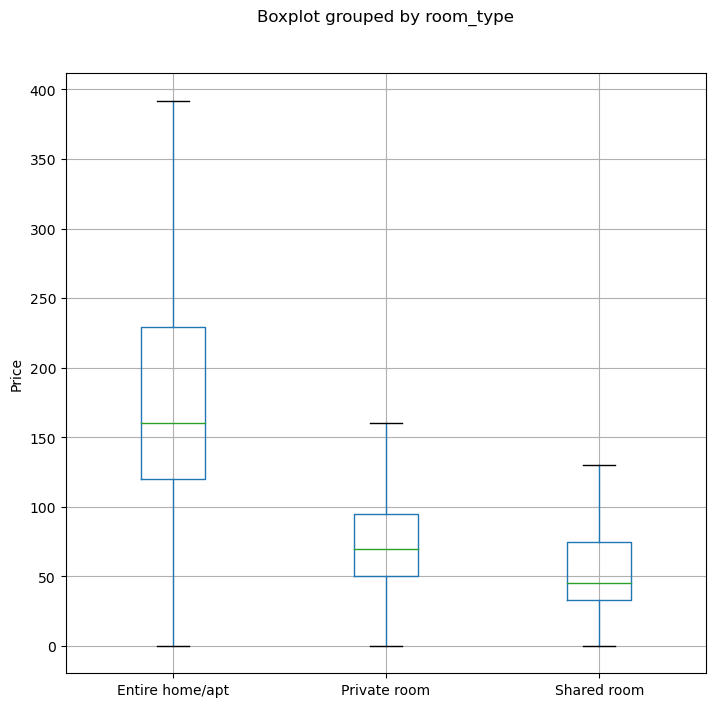

In [45]:
# Box plot for prices related with room _type
box_plot = nyc_airbnbs.boxplot(column='price',by='room_type', showfliers=False, figsize=(8,8))
box_plot.set_ylabel("Price")
box_plot.set_xlabel(None)
box_plot.set_title(None)

In [46]:
#Calculating min and max threshold
MinThreshold,MaxThreshold = nyc_airbnbs.price.quantile([0.01,0.999])
MinThreshold,MaxThreshold

(30.0, 3000.0)

In [47]:
MinMax_df = nyc_airbnbs[(nyc_airbnbs.price > MinThreshold) & (nyc_airbnbs.price < MaxThreshold)]
MinMax_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_reviewed_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9,NaN
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,NaN
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27,NaN
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2,NaN


In [48]:
# the highest average/day in each neighbourhood groups
Average = MinMax_df.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().reset_index()
Average

,neighbourhood_group,neighbourhood,price
0,Bronx,Allerton,87.595238
1,Bronx,Baychester,75.428571
2,Bronx,Belmont,101.437500
3,Bronx,Bronxdale,58.888889
4,Bronx,Castle Hill,63.000000
...,...,...,...
216,Staten Island,Tottenville,144.857143
217,Staten Island,West Brighton,80.555556
218,Staten Island,Westerleigh,71.500000
219,Staten Island,Willowbrook,249.000000


In [49]:
TopGroup = Average.loc[Average.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price', ascending=False)
TopGroup

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
121,Manhattan,Tribeca,410.531429
163,Queens,Neponsit,274.666667


Text(0, 0.5, 'price')

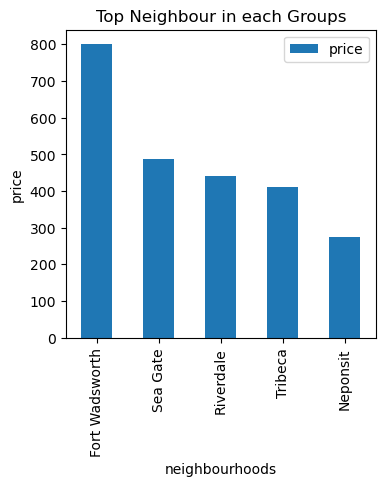

In [50]:
TopGroup.plot.bar(x = 'neighbourhood', rot = 90, title = 'Top Neighbour in each Groups', figsize = (4,4))
plt.xlabel('neighbourhoods')
plt.ylabel('price')

In [51]:
#Finfing most expensive Airbnb in NY
df_expensive = MinMax_df.loc[MinMax_df.groupby(['neighbourhood_group'])['price'].idxmax()][['name', 'neighbourhood_group', 'host_name', 'price']]
Expensive = df_expensive.sort_values(by='price', ascending=False)
Expensive

,name,neighbourhood_group,host_name,price
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Lisa,2999
29665,Park Place Townhouse by (Hidden by Airbnb),Brooklyn,Sally,2626
42680,Majestic Mansion LifeStyle :),Queens,Shah,2600
24477,"""The luxury of Comfort""",Bronx,Kathy,2500
45572,Central Hall Colonial with Free Parking Bus EX...,Staten Island,Anastasios,1250


Text(0.5, 1.0, 'Longitude & Latitude')

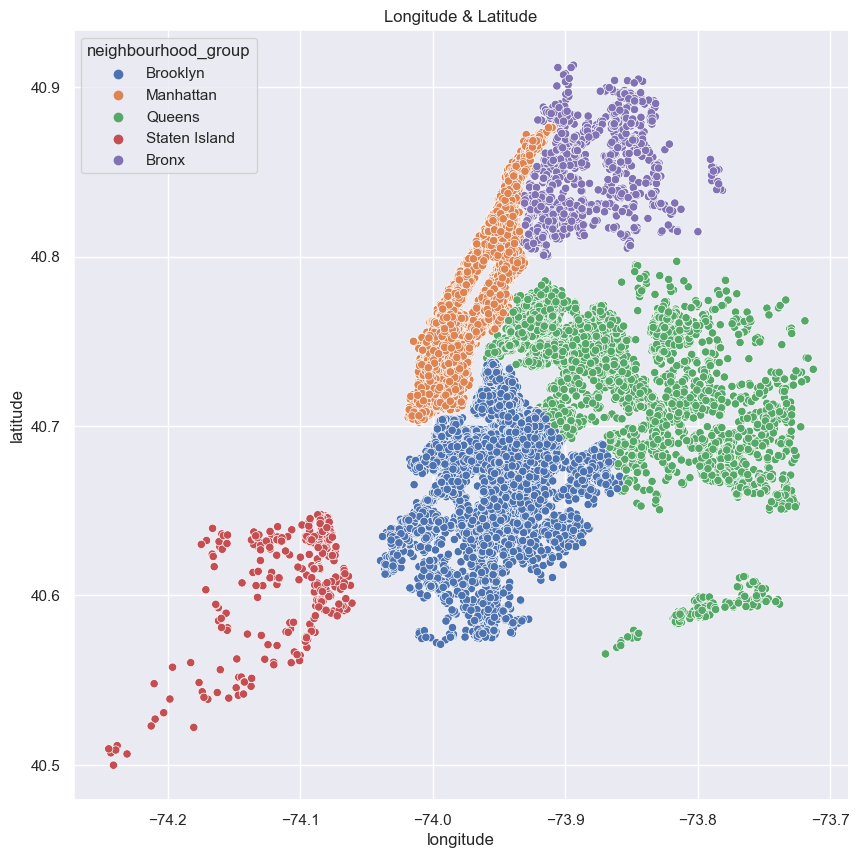

In [52]:
# checking where they belong on the map using longitude and latitudes
#Latitude and Longitudes Graph
sns.set(rc={'figure.figsize':(10,10)})
ScatterPlot = sns.scatterplot(data = MinMax_df, x = 'longitude', y = 'latitude', hue = 'neighbourhood_group')
ScatterPlot.set_title('Longitude & Latitude')